In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
with MPRester("facKDsz6VWnDbALnDd") as m:
    bdstructure = m.get_bandstructure_by_material_id("mp-9089")

# Détermination de la bande interdite

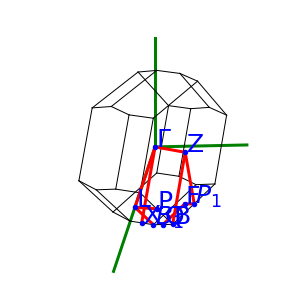

In [3]:
BSPlott = BSPlotter(bdstructure)
BSPlott.plot_brillouin()

{'direct': False, 'energy': 2.156, 'transition': '\\Gamma-F'}
Index vbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})
Index cbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})


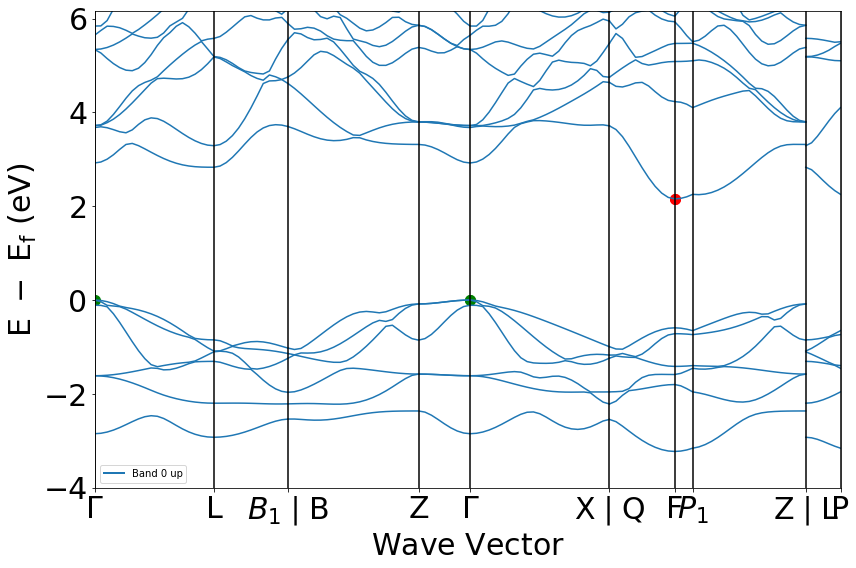

In [4]:
#Structure électronique
BSPlott.get_plot(vbm_cbm_marker=True)
BdGap = bdstructure.get_band_gap()
print(BdGap)
Elem = BSPlott.bs_plot_data()
LM = Elem.get('energy')
position = Elem.get('distances')
vbm = bdstructure.get_vbm()
cbm = bdstructure.get_cbm()
print("Index vbm :" , vbm['band_index'])
print("Index cbm :" , cbm['band_index'])


# direction de la dernière (première) bande de valence (conduction) qui présente le plus et le moins de dispersion

In [5]:
Dist = Elem.get('ticks').get('distance')
Dist = np.array([Dist[0],Dist[1],Dist[3],Dist[4],Dist[6],Dist[8],Dist[9],Dist[11],Dist[13],Dist[14]])

In [6]:
dx = np.zeros(9)
dyc = np.zeros(9)
dyv = np.zeros(9)
mc = np.zeros(9)
mv = np.zeros(9)

for i in range(9):
    dx[i] = Dist[i+1] - Dist[i]
    
for i in range(9):
    dyv[i] =LM.get('1')[i][14][-1] - LM.get('1')[i][14][0]
    dyc[i] =LM.get('1')[i][15][-1] - LM.get('1')[i][15][0]
    
for i in range (9):
    mc[i] = dyc[i]/dx[i]
    mv[i] = dyv[i]/dx[i] 

In [7]:
mxV = np.max(abs(mv))
mxC = np.max(abs(mc))
mnC = np.min(abs(mc))
mnV = np.min(abs(mv))

In [8]:
print('Dispertion sur la dernière bande de valence \n')
print('La plus grande dispertion pour la dernière bande de valence a lieu sur: X|Q-F.','Elle vaut :', mxV,"Elle est représentée par une flèche verte","\n")
print('La plus faible dispertion pour la dernière bande de valence a lieu sur: Gamma-L.','Elle vaut :', mnV,"Elle est représentée par une flèche rouge", "\n")
print('Dispertion sur la première bande de conduction \n')
print('La plus grande dispertion pour la première bande de conduction a lieu sur: B1|B-Z.','Elle vaut :', mxC,"Elle est représentée par une flèche jaune", "\n")
print('La plus faible dispertion pour la première bande de conduction a lieu sur: Z-Gamma.','Elle vaut :', mnC,"Elle est représentée par une flèche bleue", "\n")




Dispertion sur la dernière bande de valence 

La plus grande dispertion pour la dernière bande de valence a lieu sur: X|Q-F. Elle vaut : 0.9508157287110742 Elle est représentée par une flèche verte 

La plus faible dispertion pour la dernière bande de valence a lieu sur: Gamma-L. Elle vaut : 0.2134714109140714 Elle est représentée par une flèche rouge 

Dispertion sur la première bande de conduction 

La plus grande dispertion pour la première bande de conduction a lieu sur: B1|B-Z. Elle vaut : 3.147618463280953 Elle est représentée par une flèche jaune 

La plus faible dispertion pour la première bande de conduction a lieu sur: Z-Gamma. Elle vaut : 0.10043548544170883 Elle est représentée par une flèche bleue 



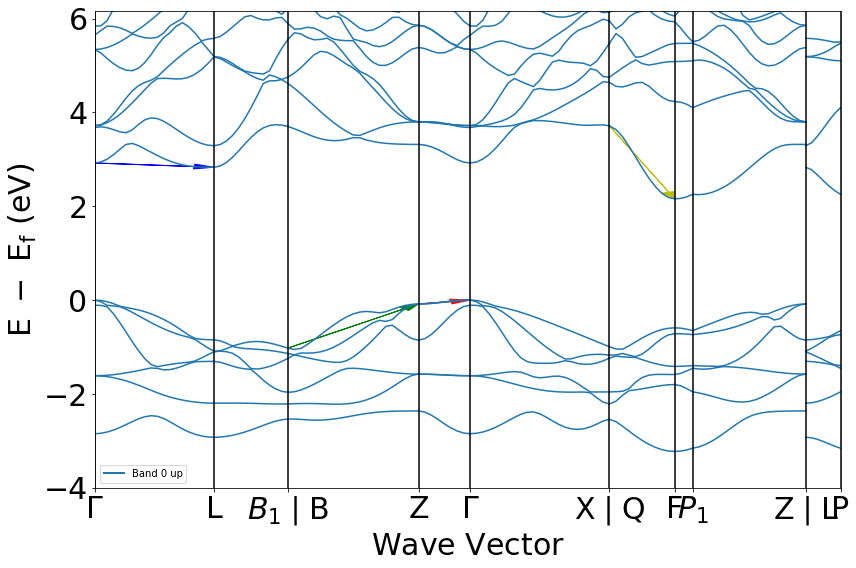

In [9]:
BSPlott.get_plot()
plt.arrow(Dist[3], (LM.get('1')[3][14])[0], dx[3], dyv[3], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(Dist[2], (LM.get('1')[2][14])[0], dx[2], dyv[2], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(Dist[0], (LM.get('1')[0][15])[0], dx[0], dyc[0], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(Dist[5], (LM.get('1')[5][15])[0], dx[5], dyc[5], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

# Masse effective au sommet (base) de la dernière (première) bande de valence (conduction)

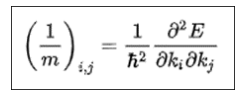

In [10]:
img=img.imread('MasseEffective.png')
fig, axes = plt.subplots(figsize=(4,4))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(img)
plt.show()

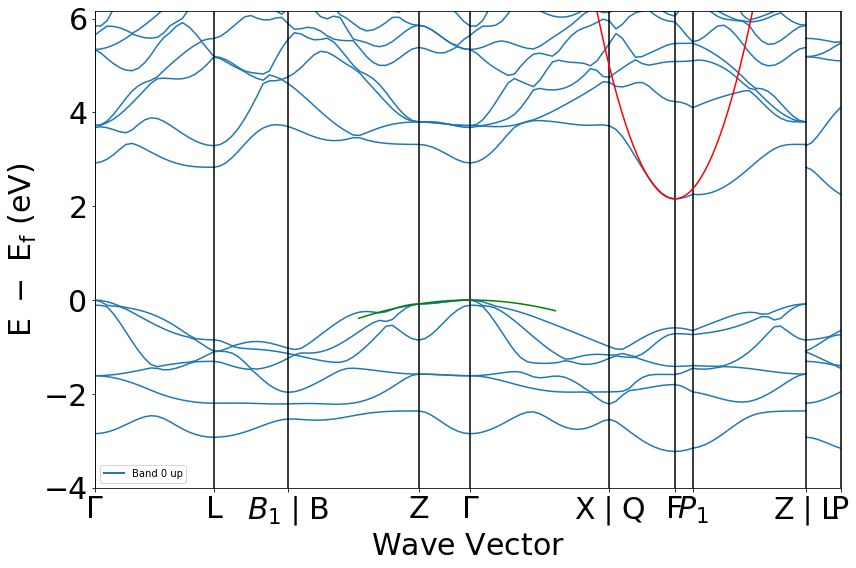

In [12]:
#Coordonnées du sommet de la bande de valence
[x1,y1] = [position[3][8],LM.get('1')[3][14][8]]
#Coordonnées d'un autre point
[x2,y2] = [position[3][0],LM.get('1')[3][14][0]]

#Coordonnées du bas de la bande de conduction
[x3,y3] = [position[5][10],LM.get('1')[5][15][10]]
#Coordonnées d'un autre point
[x4,y4] = [position[5][6],LM.get('1')[5][15][6]]

# équation parabole : f(k) = mVal*(k-pVal)**2
mVal = y2/(x2-x1)**2
pVal = x1

def fVal(x):
    return mVal*(x-pVal)**2

xVal = np.arange(2,3.5,0.01)
yVal = fVal(xVal)

# équation parabole : f(k) = mCond*(k-pCond)^2 + y3
mCond = (y4-y3)/(x4-x3)**2
pCond = x3

def fCond(x):
    return mCond*(x-pCond)**2 + y3

xCond = np.arange(-1,10,0.01)
yCond = fCond(xCond)

BSPlott.get_plot()
plt.plot(xCond,yCond,color ='r')
plt.plot(xVal,yVal,color = 'g')

In [14]:

print('Equation de la parabole : f(k) = ', mVal,'* ( k -',pVal,')²')
print('Dérivée seconde de f : f\'\'(k) = ', 2*mVal,'[eV.A²]')
print("A=",10**-10,"[m]")
print("eV=",1.602176634*(10**-19),"[J]")
print('On adapte les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*mVal*((10**-10)**2)*(1.602176634*(10**-19)), '[J.m²]')
print("h_barre=",1.054571817*(10**-34),"[Js]")
print('La masse effective vaut :')
print('m* = ',abs(((1.054571817*(10**-34))**2)/(2*mVal*((10**-10)**2)*(1.602176634*(10**-19)))),'[kg]')
print('Au sommet de la bande de valence')

Equation de la parabole : f(k) =  -0.5464033966144394 * ( k - 2.844299542322163 )²
Dérivée seconde de f : f''(k) =  -1.0928067932288787 [eV.A²]
A= 1e-10 [m]
eV= 1.6021766340000001e-19 [J]
On adapte les unités de la dérivée seconde :
f''(k) =  -1.7508695095877794e-39 [J.m²]
h_barre= 1.054571817e-34 [Js]
La masse effective vaut :
m* =  6.351825256655003e-30 [kg]
Au sommet de la bande de valence


In [16]:
print('Equation de la parabole : f(k) = ', mCond,'* ( k -',pCond,')² + ',y3)
print('Dérivée seconde de f : f\'\'(k) = ', 2*mCond,'[eV.A²]')
print("A=",(10**-10),"[m]")
print("eV=",1.602176634*(10**-19),"[J]")
print('On adapte les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*mCond*((10**-10)**2)*1.602176634*(10**-19), '[J.m²]')
print("h_barre=",1.054571817*(10**-34),"[Js]")
print('La masse effective est donc :')
print('m* = ',((1.054571817*(10**-34))**2)/(2*mCond*((10**-10)**2)*1.602176634*(10**-19)),'[kg]')
print('En bas de la bande de conduction')

Equation de la parabole : f(k) =  11.5212424898853 * ( k - 4.393851512776629 )² +  2.156
Dérivée seconde de f : f''(k) =  23.0424849797706 [eV.A²]
A= 1e-10 [m]
eV= 1.6021766340000001e-19 [J]
On adapte les unités de la dérivée seconde :
f''(k) =  3.6918131023884424e-38 [J.m²]
h_barre= 1.054571817e-34 [Js]
La masse effective est donc :
m* =  3.0123998327303923e-31 [kg]
En bas de la bande de conduction
